

# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.


This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘genres’ and'production_companies', contain multiple values separated by pipe (|) characters.

List of columns: 
budget:how much the production companies spent on producing the movie
genres: What type of movies being produced
homepage: URL of the movie’s official homepage, if available.
id: Unique identifier for each movie in the dataset.
keywords: Specific keywords associated with the movie, which might indicate themes or plot elements.
original_language: Language primarily spoken in the movie.
original_title: Original title of the movie.
overview: A brief summary or synopsis of the movie’s storyline.
popularity: Popularity score, potentially reflecting audience interest or search frequency.
production_companies: Companies responsible for producing the movie, potentially revealing industry trends.
production_countries: Countries associated with the production, possibly indicating market trends or production location preferences.
release_date: The date when the movie was initially released to the public.
revenue: Total revenue earned from box office sales, indicating the financial success of the movie.
runtime: The movie’s duration, in minutes.
spoken_languages: Languages spoken in the movie, which may attract specific regional audiences.
status: Current status of the movie (e.g., released, in production).
tagline: A brief, catchy phrase used to market the movie.
title: The official name of the movie.
vote_average: Average rating given by users who have watched the movie.
vote_count: Total number of users who rated the movie.


### Question(s) for Analysis:

###### 1st_Question:
Which companies produced the most movies in the dataset.

###### 2nd_Question:
How much effect do the production companies have on the flop or success of any movies estimating the succsess by revenues and budgets?

##### 3rd_Question:
Is the revenue and budget corelated? what's the relation between them?

In [26]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [27]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df_movies = pd.read_csv('tmdb_5000_movies.csv')

df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


Now, I'll  make sure if there is any data type that don't match the description for the columns

In [28]:
df_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Now, knowing that the datatype are all good, we're set to see if there are any null values of our columns

In [29]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Here we can see there are some missing values in our data, some of which can be filled using the mean such as 'runtime' column, while others don't give useful information to our investigation and can't be filled algebrically, thus we drop them out.


### Data Cleaning
 

In [30]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
mean = df_movies['runtime'].mean()
df_movies['runtime'] = df_movies['runtime'].fillna(mean)


In [31]:
# drop columns I don't get any benefit for my questions and they include some null values: 'tagline', 'homepage', 'release_date', 'overview'
df_movies.drop(['tagline', 'homepage', 'overview', 'release_date'], axis=1, inplace=True)

# confirm changes
df_movies.head(1)

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800


In [32]:
# checks if any of columns in the dataframe have null values
df_movies.isnull().sum().any()

False

Now, we need to confirm if there are any duplicated columns, if there are any we need to drop them out of our dataframe.

In [33]:
sum(df_movies.duplicated())

0

In [34]:
df_movies.shape

(4803, 16)

So, after cleaning we have the following Columns Used: Out of the original columns, we retained essential ones related to the analysis questions, such as budget, revenue, genres, production_companies, and vote_average. Unnecessary columns like tagline, homepage, overview, and release_date were removed to focus on relevant data of diminssion 4803 in rows, and 16 columns.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: 
Which companies produced the most movies in the dataset.


First, we need to find the different production companies types we have.

In [35]:
df_movies["production_companies"].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              351
[{"name": "Paramount Pictures", "id": 4}]                                                                                                                                                                                                                                                                                                                                                                                                           

We note that each entry in the "production_companies" column contains data in a JSON-like format (list of dictionaries) instead of simple strings. Which makes it challenging for value_counts() to work properly.
So, we need to do 3 things:
1) to convert the JSON-like format to actuall lists of dictionaries using ast.literal_eval(entry) which converts each string representation of a list into an actual Python list.
2) use the explode method to make a row out of each companies name.
3) to count the number of occurrences for each producing company we have.

In [36]:
# 1: Convert JSON-like strings to actual lists of dictionaries
import ast
df_movies["production_companies"] = df_movies["production_companies"].apply(ast.literal_eval)

# 2: Explode the lists in 'production_companies' so each company has its own row
df_exploded = df_movies.explode("production_companies")

# 3: Extract company names and count occurrences
company_counts = df_exploded["production_companies"].apply(lambda x: x["name"] if isinstance(x, dict) else None).value_counts()

company_counts.head()

Warner Bros.                              319
Universal Pictures                        311
Paramount Pictures                        285
Twentieth Century Fox Film Corporation    222
Columbia Pictures                         201
Name: production_companies, dtype: int64

In [37]:
company_counts

Warner Bros.                              319
Universal Pictures                        311
Paramount Pictures                        285
Twentieth Century Fox Film Corporation    222
Columbia Pictures                         201
                                         ... 
Greenlit Rights                             1
Q Productions                               1
Central Films                               1
Goodspeed Productions                       1
lucky crow films                            1
Name: production_companies, Length: 5017, dtype: int64

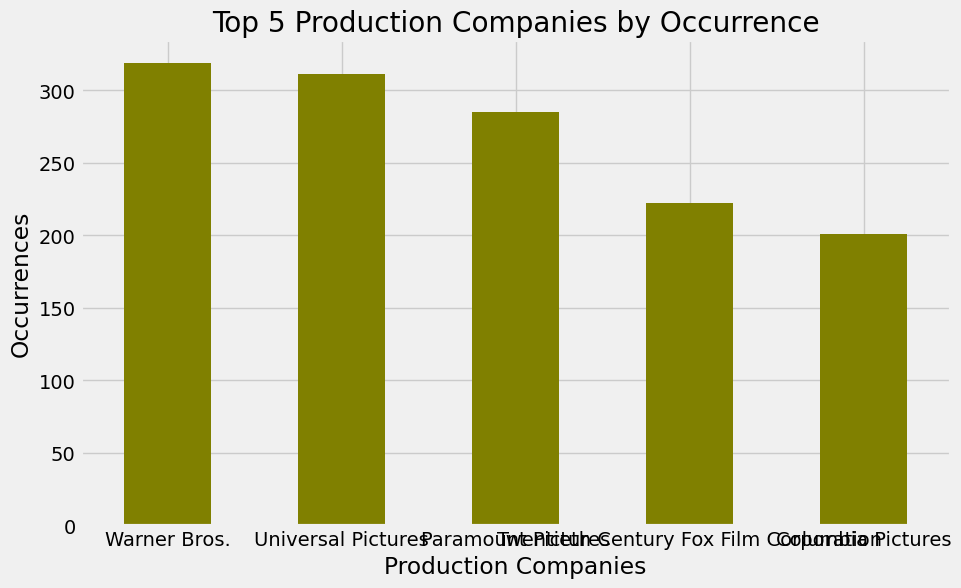

In [38]:
#Plotting
plt.figure(figsize=(10, 6))
company_counts.head().plot(kind= 'bar' , color = 'olive')
plt.title('Top 5 Production Companies by Occurrence')
plt.ylabel('Occurrences')
plt.xlabel('Production Companies')
plt.xticks(rotation = 0)

plt.show()

As shown in the figure, Warner Bros was the most active production company to produce movies in this dataset , followed by Universal Pictures with not a big difference between them both. While Columbia Pictures was the least company to produce movies.

### Research Question 2:
How much effect do the production companies have on the flop or success of any movies estimating the succsess by revenues and budgets?

To be able to see the effects (shown finnancially) of the choise of the producing company, we can take the ration of the revenues and budgets, where the success is then measured by having the ratio >= 1
failur on the other hand is when the ratio < 1

In [39]:
# Since we already rewrite our JSON-LIKE FORMAT to lists of dictionries in producion_compenies column, before we extracted df_exploded with value_counts , now without any thing additional we extract the company name from each dictionary
df_exploded['production_company'] = df_exploded['production_companies'].apply(lambda x: x['name'] if isinstance(x, dict) else None)

In [40]:
# Group by the new production companies and calculate mean of revenue and budget

df_profit = df_exploded.groupby('production_company').mean(numeric_only=True)[['revenue', 'budget']]

df_profit.head()

,revenue,budget
production_company,,
"""DIA"" Productions GmbH & Co. KG",44350926.0,36000000.0
1.85 Films,98017.0,500000.0
10 West Studios,0.0,0.0
100 Bares,28982921.5,12000000.0
1019 Entertainment,2801508.0,2000000.0


Here clearly we might have an issue where the budget's value =0 thus, to avoid upcoming problem I'll drop every row that have the budget and ravenue means = 0

In [41]:
# Drop rows where both 'revenue' and 'budget' are zero
df_profit = df_profit[(df_profit['revenue'] != 0) | (df_profit['budget'] != 0)]

In [42]:
# to confirm
df_profit.head()

,revenue,budget
production_company,,
"""DIA"" Productions GmbH & Co. KG",44350926.0,36000000.0
1.85 Films,98017.0,500000.0
100 Bares,28982921.5,12000000.0
1019 Entertainment,2801508.0,2000000.0
10th Hole Productions,34705850.0,3500000.0


In [43]:
# add a column represention the ratio 
df_profit['ratio_profit'] = df_profit['revenue'] / df_profit['budget']

In [44]:
# here we'll identify the success and flop for the profit ratio
df_profit['success'] = df_profit['ratio_profit'].apply(lambda x: 'Success' if x >= 1 else 'Flop')

# Display to confirm
df_profit.head()

,revenue,budget,ratio_profit,success
production_company,,,,
"""DIA"" Productions GmbH & Co. KG",44350926.0,36000000.0,1.231970,Success
1.85 Films,98017.0,500000.0,0.196034,Flop
100 Bares,28982921.5,12000000.0,2.415243,Success
1019 Entertainment,2801508.0,2000000.0,1.400754,Success
10th Hole Productions,34705850.0,3500000.0,9.915957,Success


In [45]:
# to make sure there is no Nan values in the df_profit dataset specifically in the ratio_profit column i'LL CHECK first and filter if there are any

df_profit['ratio_profit'].isna().sum()

0

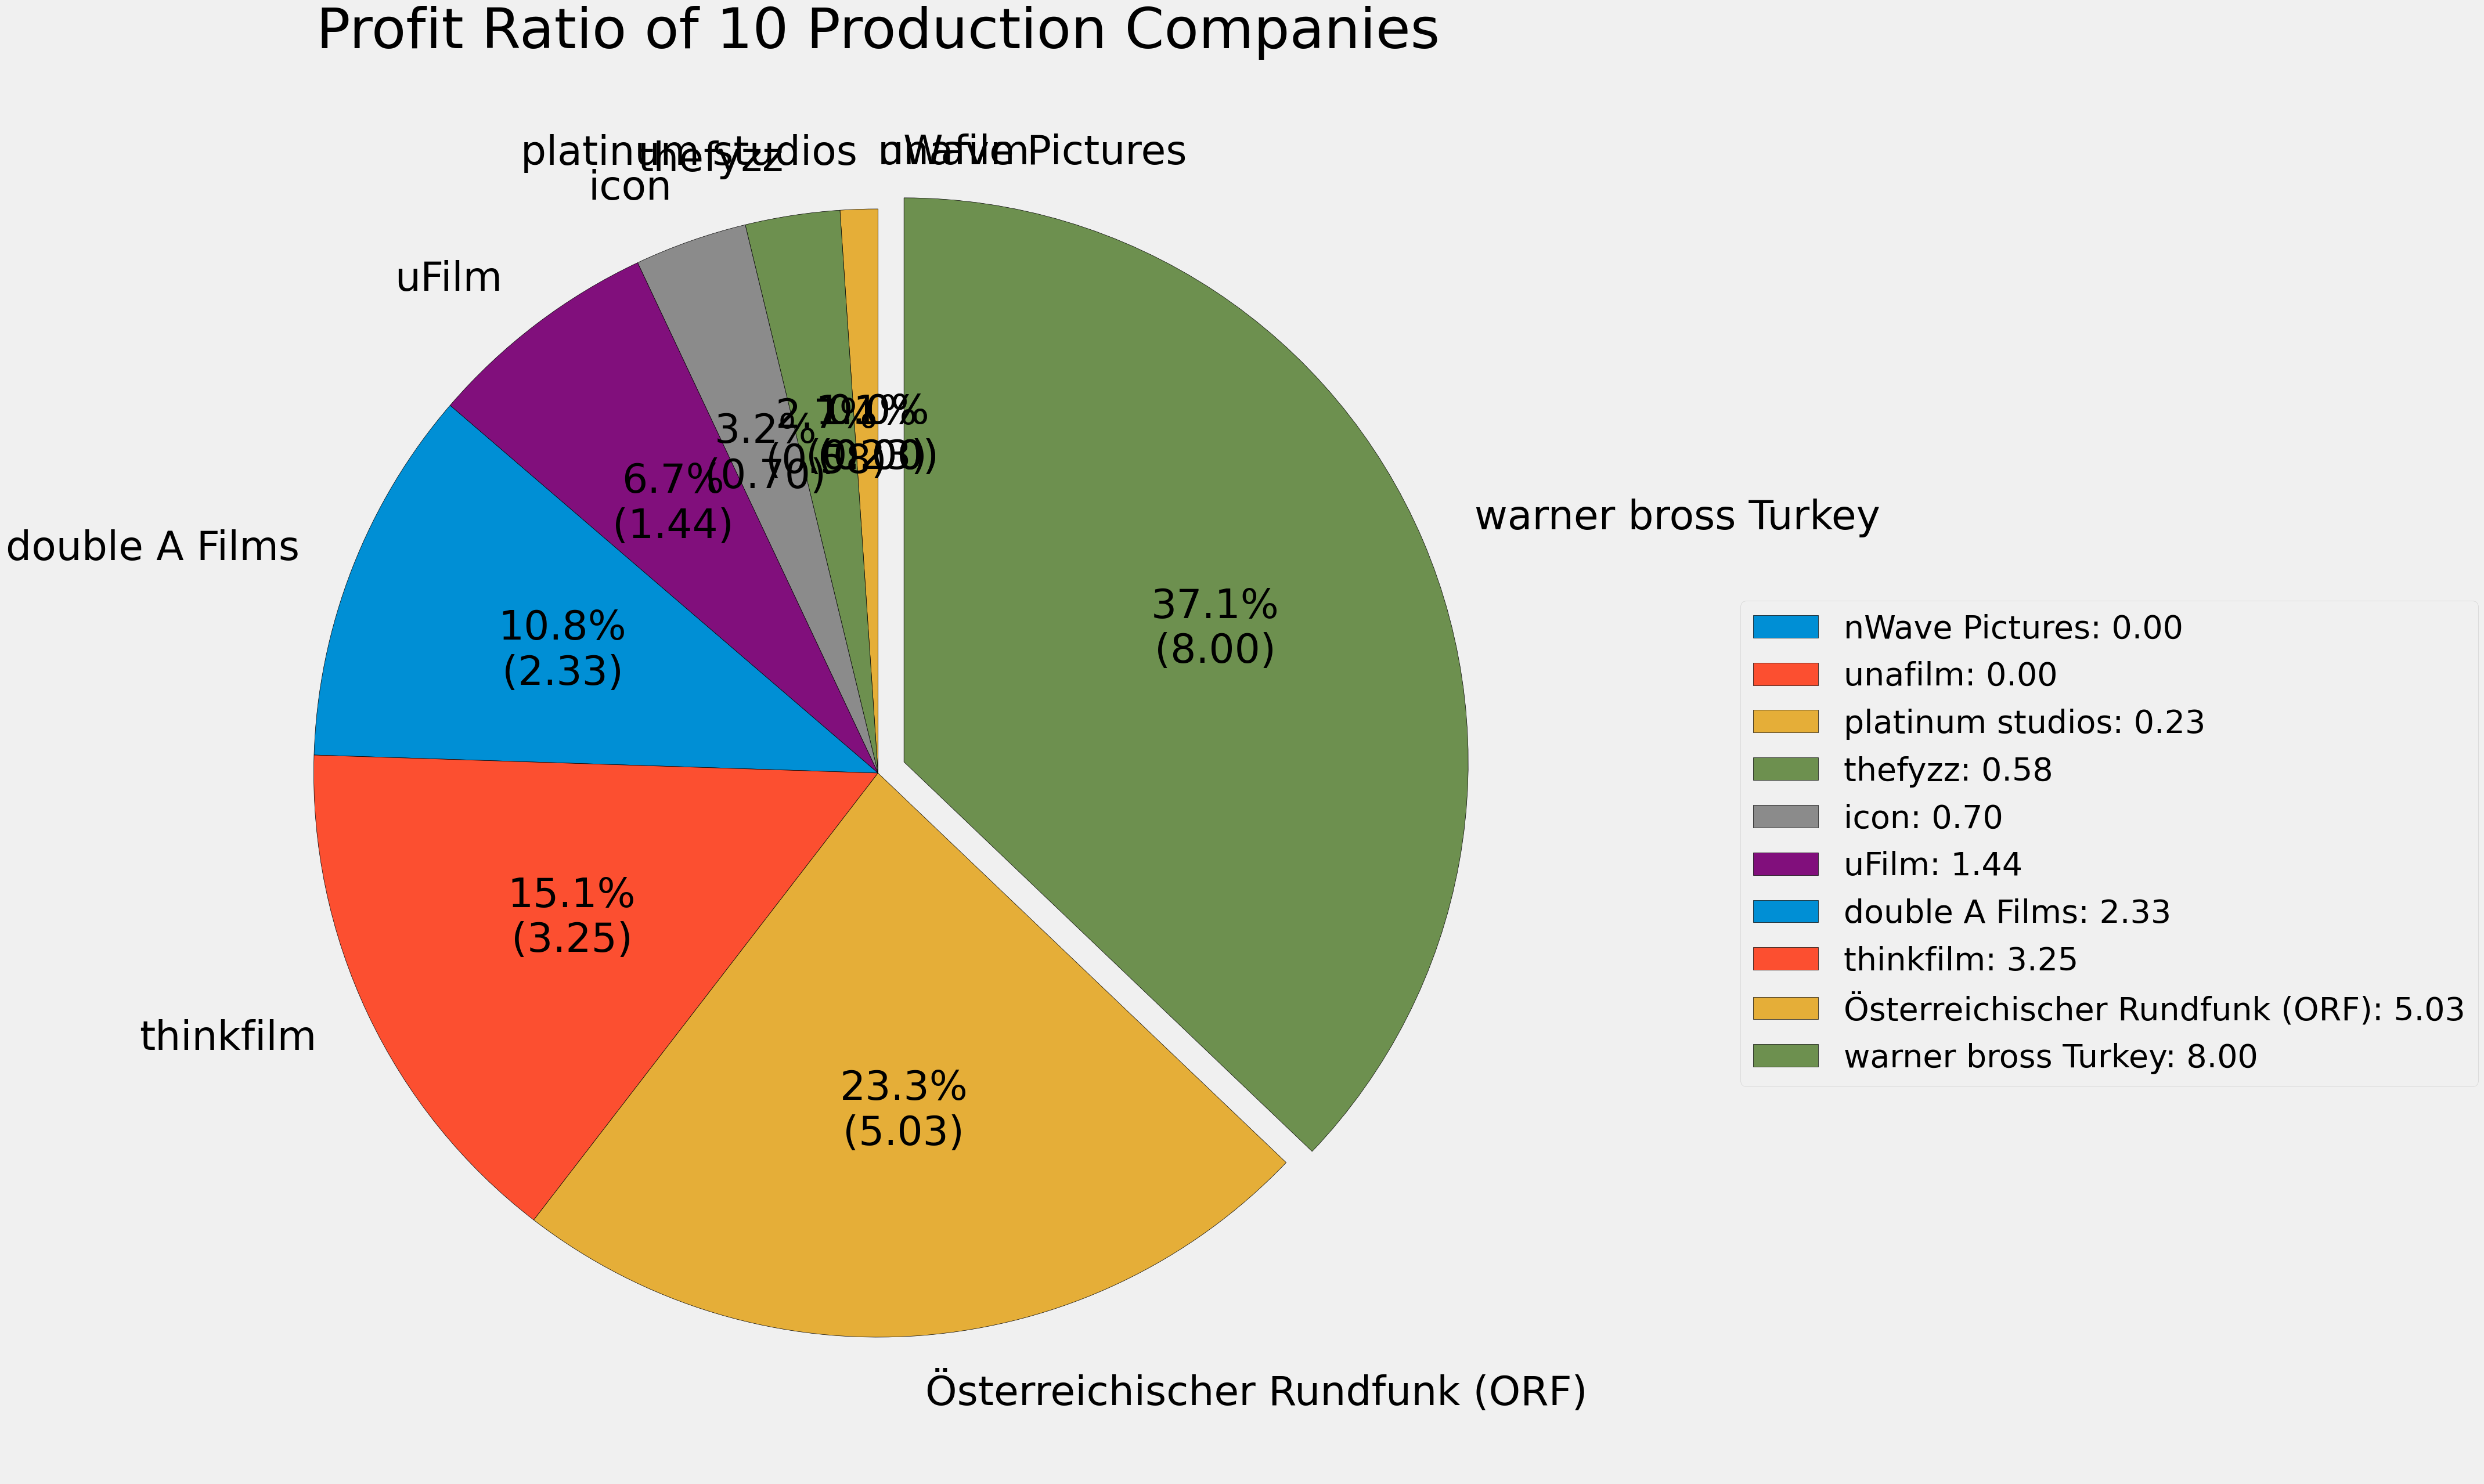

In [46]:
# Sort and select the bottom 10 companies by profit ratio for the pie chart
pr_companies = df_profit.tail(10).sort_values(by='ratio_profit', ascending=True)

# Prepare data for the pie chart
values = pr_companies['ratio_profit']
labels = pr_companies.index  # Company names

# Plotting the pie chart
plt.figure(figsize=(30, 30))
plt.pie(
    values,
    labels=labels,
    autopct=lambda pct: f"{pct:.1f}%\n({pct / 100 * values.sum():.2f})",  # Show % and actual value inside wedges
    startangle=90,  # Rotate to start at 90 degrees
    explode=[0.05 if i == values.idxmax() else 0 for i in pr_companies.index],  # Explode the highest section
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 50},  # Font size for labels around the pie chart
    labeldistance=1.1  # Distance of labels from the center
)

# Set the title with padding
# Adjust title and legend placement for readability
plt.title("Profit Ratio of 10 Production Companies", fontsize=70, pad=25)
plt.ylabel("")  # Hide y-axis label for a cleaner look
plt.legend(
    labels=[f"{name}: {ratio:.2f}" for name, ratio in zip(pr_companies.index, pr_companies['ratio_profit'])],
    loc="center left",
    bbox_to_anchor=(1.1, 0.45),  # Move legend to the right of the chart
    fontsize=40  
)
plt.show()


As one can see we could tell what production companies overall impact on the fauilr or succsess of luanching a movie using its mean budget that cost them to produce a movie, and their mean ravenue they got from the cinema places. 

### Question 3:
Now, one can only think what about the revenue and budget? how they are corelated? what's the relation between them? is it linear? Directly propotinal or inversely propotinal relationship? 

My approch here to answer the prevouis questions will be using different types of plots to get a clear vision of how one can affect the other.

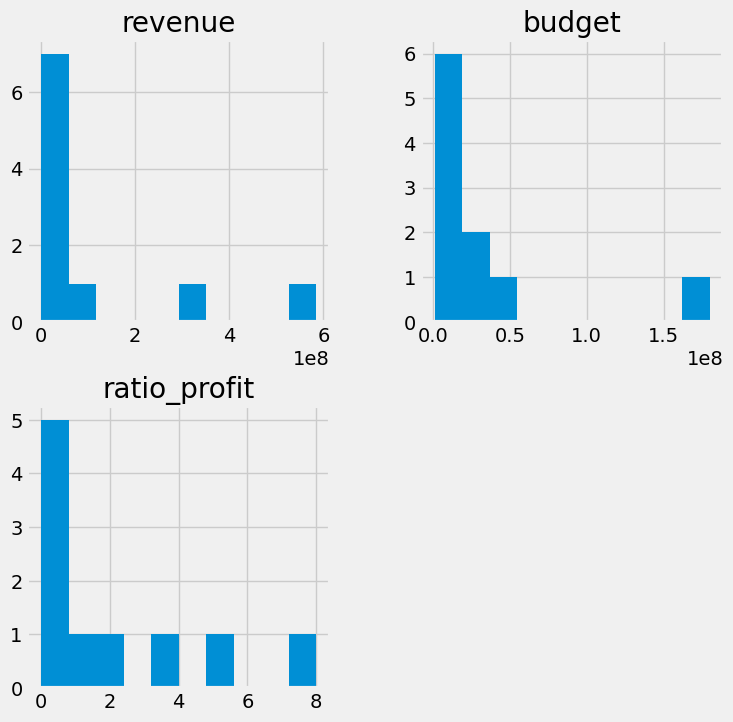

In [47]:
# dirst I'll plot a Histogram showing all the numerically columns distribution

pr_companies.hist(figsize=(8, 8));

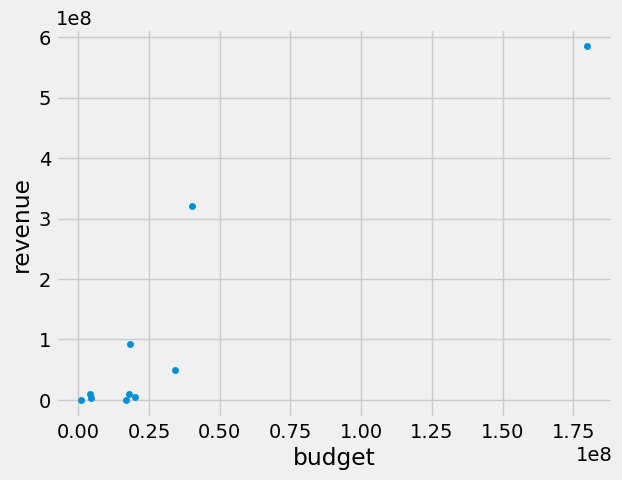

In [48]:
# Now I'll do a scatter plot of two columns, budget and revenue
pr_companies.plot(x='budget', y='revenue', kind='scatter');

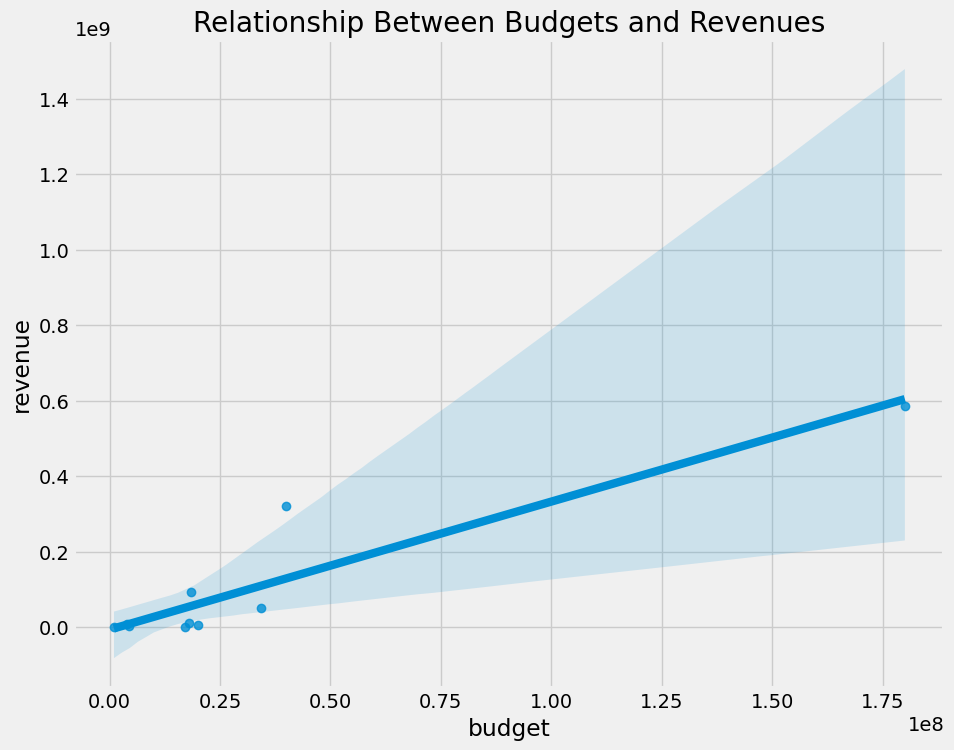

In [49]:
#to actyally see the linear relaionship these columns share I'll use seaborn

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Relationship Between Budgets and Revenues")
sns.regplot(x="budget", y="revenue", data=pr_companies)
plt.show()

So, clearly from the plots shown above we can say that budget and revenue are corelated where, whenever there is a big budget for producing a movie we can expect a great revenue to get.

<a id='conclusions'></a>
## Conclusions

#### Production Volume and Success:

Warner Bros. and Universal Pictures have a higher number of productions, and a significant portion of their movies reach a profit_ratio above 1. This suggests that larger companies may benefit from economies of scale, giving them a more consistent formula for producing financially successful films.

On top of that, we highlighted how some companies show higher profitability trends, possibly due to budget management or production efficiency.

And we've seen the role of budget and revenue, effectively linking production company activity with financial success. 

Thus, one can only answer the questions by saying that the top producing companies as a measure of occurances are Warner Bros, Universal Pictures, Paramount Pictures, Twentieth Century Fox Film Corporation, and Columbia Pictures.     

Whereas, the impact of any producing company on the succsess or failure of movies  may depend on many things but we found that the brand name(the name of the company) and how cabalbe it's to advertise actually have a great impact on the success of the movie.

Last but not least, we found the behaviour of baudgets and revenues and how they are corleated, and we can safely conclude that they are corelated columns in which they are directly propotinal (ie. whenever the budget is great we can expect to get great revenues as well). 

#### Limitations:
However, while assesing the given dataset we worked on, we found some limitations, such as the lack of critical information, for example release season, or competitive releases, which could heavily influence a movie's success. Which may also be a great limiting factor on the resylt of the relationship between budgets ans revenues since these factors could easily disturv the distrubtions we got out of the histograms.

Another limitation I personally feel was overshadowed is the time series evaluation for these movies' views and votes, since some movies, as I like to picture it, "Get old like a fine wine," which makes the movie stand out while it vintages. So this might be interesting to see and to get the chance to analyze the characterstics of movies that obayes this sentence.

#### Further Analysis
As for any further analysis, we can investigate the most popular genraes in the movie industry, or What kinds of properties are associated with movies that have high revenues? finally, What are the characterstics of movies that get more popular in time?

## Submitting your Project 

In [50]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 1211025 bytes to Investigate_a_Dataset.html
